<a href="https://colab.research.google.com/github/thitiphon01/all-project/blob/main/ML/Predicting_TheBigMac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figue_format = 'retina'

In [ ]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.3
numpy version: 1.25.2
seaborn version: 0.13.1


In [ ]:
url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.928167,0.39739,0.16547,-0.06363,0.10547,0.96883
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29165.768649,2.317131,-0.28293,-0.40194,-0.51950,-0.43273,0.01031
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.873897,-0.05214,-0.20945,-0.36485,-0.25015,0.33548
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20976.720505,2.168026,0.49234,0.24466,0.00000,0.18059,1.10262
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.261079,-0.07587,-0.22924,-0.38075,-0.26892,0.30204


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1489 non-null   datetime64[ns]
 1   iso_a3         1489 non-null   object        
 2   currency_code  1489 non-null   object        
 3   name           1489 non-null   object        
 4   local_price    1489 non-null   float64       
 5   dollar_ex      1489 non-null   float64       
 6   dollar_price   1489 non-null   float64       
 7   GDP_bigmac     1489 non-null   float64       
 8   adj_price      1489 non-null   float64       
 9   USD            1489 non-null   float64       
 10  EUR            1489 non-null   float64       
 11  GBP            1489 non-null   float64       
 12  JPY            1489 non-null   float64       
 13  CNY            1489 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 163.0+ KB


In [ ]:
df = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1022,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.400040,-0.43135,-0.50271,-0.40109,-0.29847,-0.37607
1023,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58148.657774,4.420911,-0.04949,-0.16876,0.00110,0.17263,0.04292
1024,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.534656,3.087021,0.42174,0.24334,0.49740,0.75398,0.55995
1025,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,47946.778270,4.141975,-0.05053,-0.16967,0.00000,0.17135,0.04178
1026,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.980317,0.23350,0.07872,0.29914,0.52175,0.35341


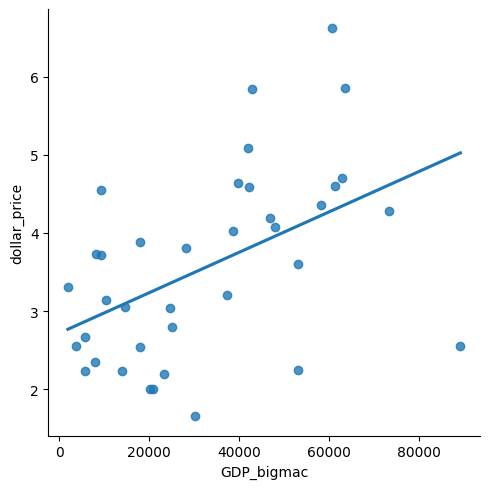

In [ ]:
sns.lmplot(x='GDP_bigmac', y='dollar_price', data=df, ci=None)

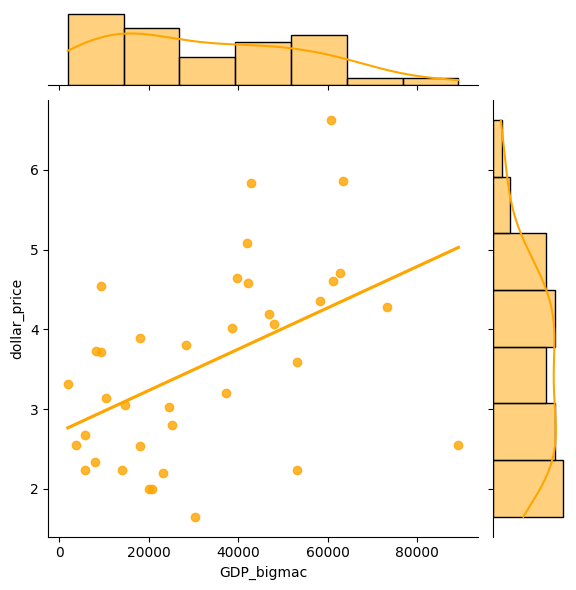

In [ ]:
sns.jointplot(x = 'GDP_bigmac', y = 'dollar_price', data = df, kind = 'reg',
              ci = None, color = 'orange');

#Sklearn: Linear Regression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.2


In [ ]:
model = LinearRegression()
model

LinearRegression()

In [ ]:
X = df[['GDP_bigmac']]
y = df.dollar_price

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.score(X, y) # R-sqr model

0.23344682453670118

In [ ]:
model.intercept_ #alfa

2.716707229073858

In [ ]:
model.coef_ #beta

array([2.58966215e-05])

In [ ]:
model.predict([[4000]]) #assume gda per cap as 9000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.82029372])

From above, if you know that the gdp per capital is 4000. You should sell Bigmac 2.82 USD.

In [ ]:
model.predict(np.linspace(4000, 50000, 20).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.82029372, 2.8829908 , 2.94568788, 3.00838497, 3.07108205,
       3.13377913, 3.19647622, 3.2591733 , 3.32187038, 3.38456747,
       3.44726455, 3.50996164, 3.57265872, 3.6353558 , 3.69805289,
       3.76074997, 3.82344705, 3.88614414, 3.94884122, 4.01153831])